In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/haofu/AMM-Python/exp/final_results/all_results_small_sigma.csv')

# df = df[df['sigma'].isin([0.2, 0.4, 0.6, 0.8, 1.0])]
print(df.columns)

Index(['sigma', 'fee_rate', 'pnl', 'fee', 'volume', 'price_distance',
       'dynamic_fee', 'total_transactions'],
      dtype='object')


### I.      Fee Rate vs. Total Fees Collected

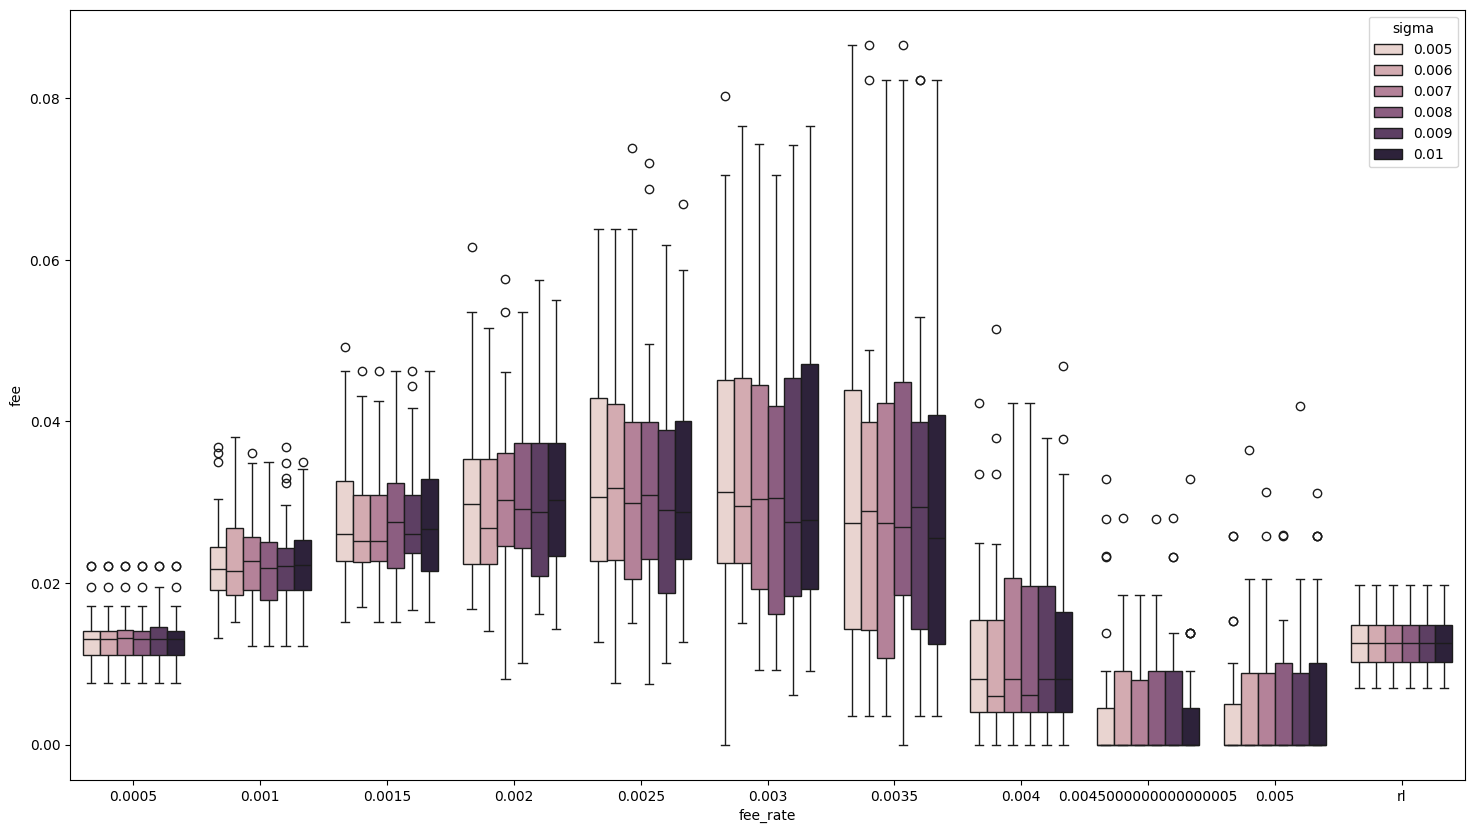

In [4]:
# plot fee_rate vs fee
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['fee'], hue=df['sigma'])
plt.show()
    

In [5]:
from scipy import stats

# Perform ANOVA for 'fee' based on 'fee_rate' for each 'sigma'
def perform_anova(df, target_col):
    unique_sigma = df['sigma'].unique()
    anova_results = {}

    for sigma_value in unique_sigma:
        subset = df[df['sigma'] == sigma_value]
        groups = [subset[target_col][subset['fee_rate'] == rate] for rate in subset['fee_rate'].unique()]
        
        f_val, p_val = stats.f_oneway(*groups)
        anova_results[sigma_value] = {'F-Value': f_val, 'P-Value': p_val}
    
    return pd.DataFrame(anova_results).T

# Run the ANOVA function
anova_results = perform_anova(df, target_col='fee')

# Display the results
print(anova_results)

         F-Value       P-Value
0.005  28.208972  1.860882e-38
0.006  28.004131  3.158949e-38
0.007  27.097848  3.351810e-37
0.008  26.464452  1.782173e-36
0.009  27.060924  3.693028e-37
0.010  26.435318  1.925326e-36


### II. Fee Rate vs. Total PnL

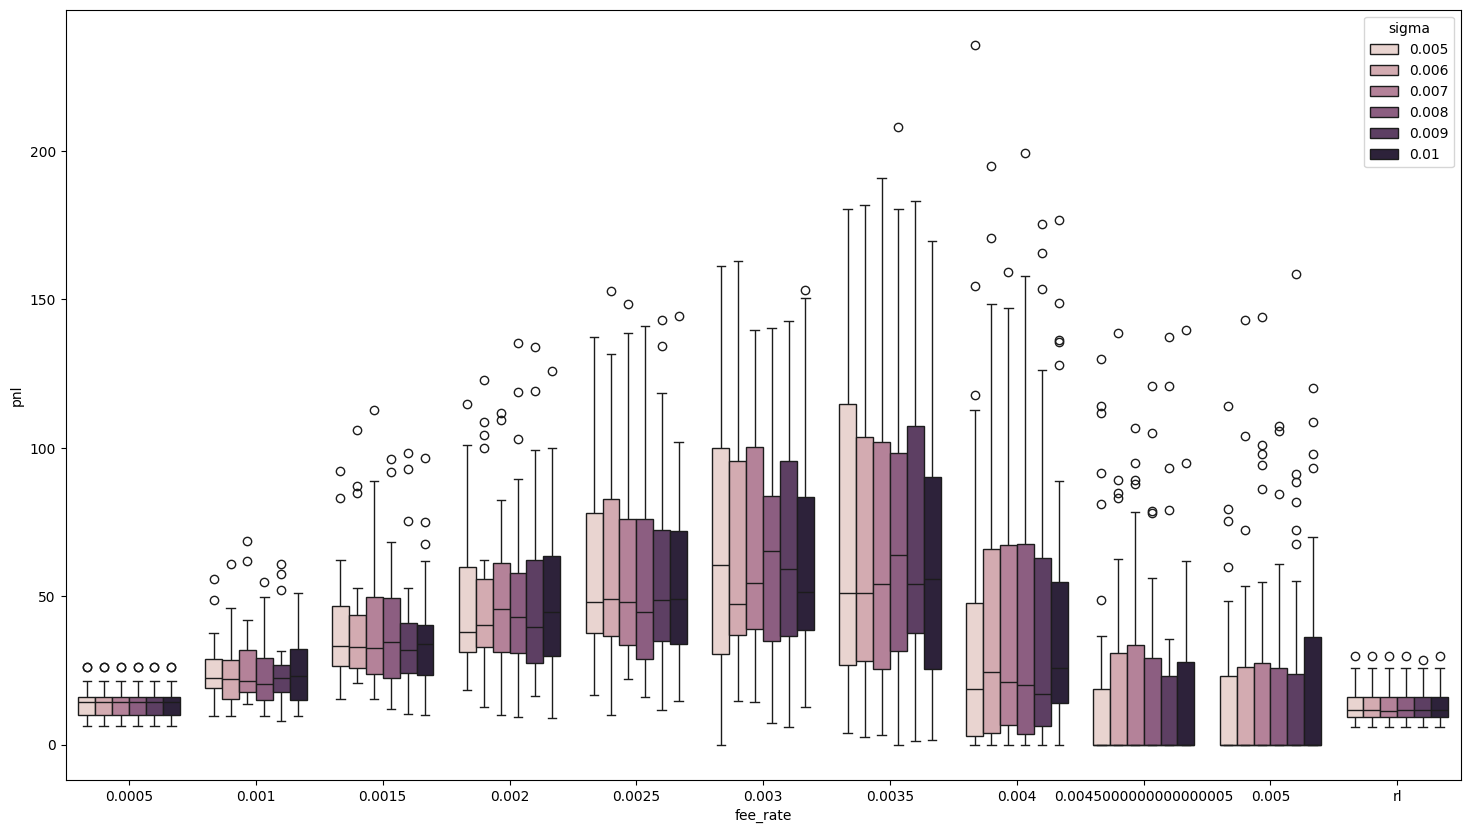

In [6]:
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['pnl'], hue=df['sigma'])
plt.show()

In [7]:
anova_results = perform_anova(df, target_col='pnl')
print(anova_results)

         F-Value       P-Value
0.005  11.934284  1.630906e-17
0.006  11.289767  1.477387e-16
0.007  10.910975  5.455258e-16
0.008  11.754459  3.008902e-17
0.009  10.991754  4.126035e-16
0.010  11.482495  7.624561e-17


### III.    Fee Rates vs. Trading Volume

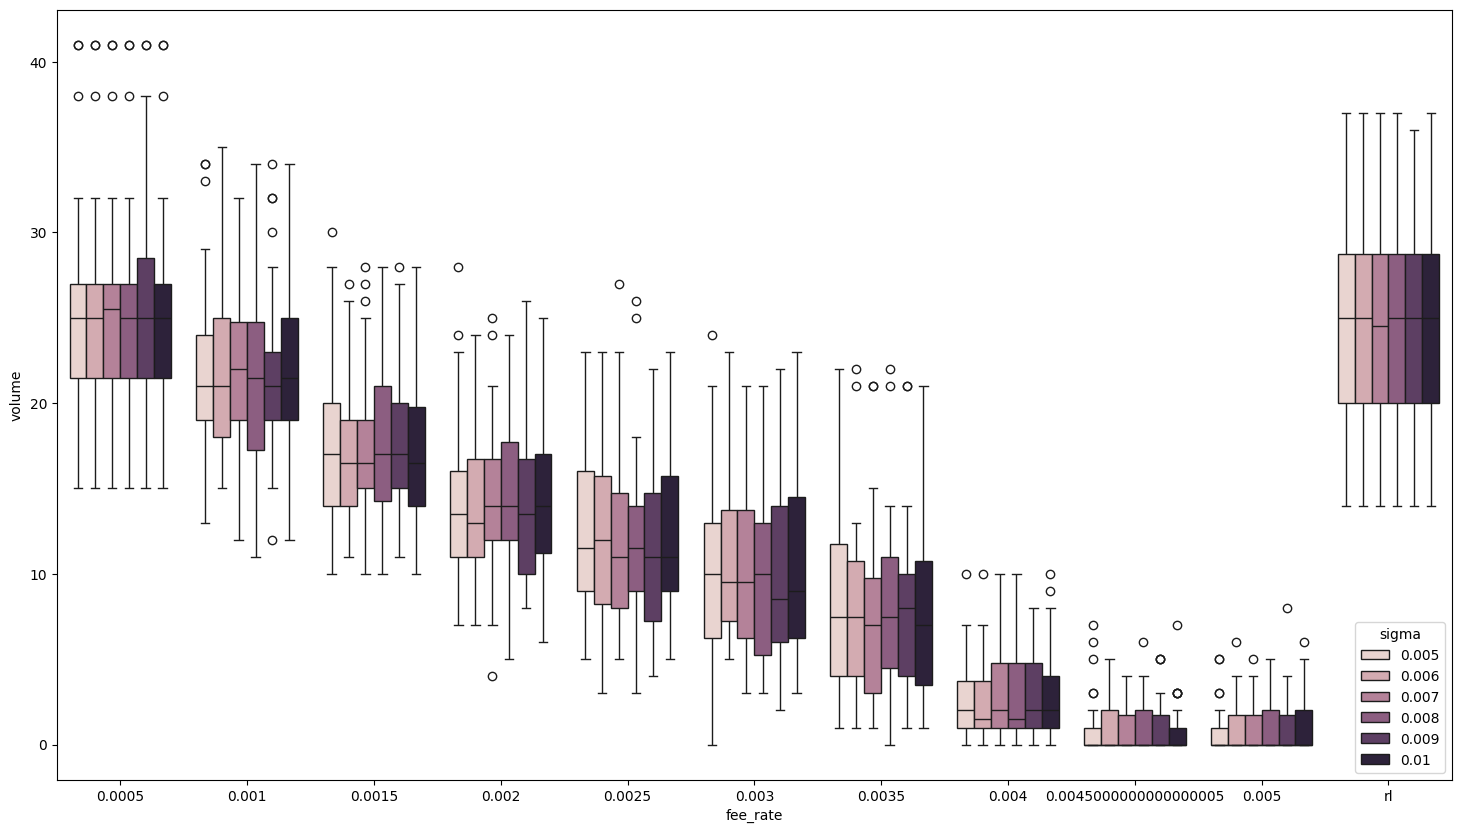

In [8]:
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['volume'], hue=df['sigma'])
plt.show()

In [9]:
anova_results = perform_anova(df, target_col='volume')
print(anova_results)

          F-Value       P-Value
0.005  108.136643  3.475322e-96
0.006  114.827958  2.141752e-99
0.007  111.074685  1.297553e-97
0.008  104.773279  1.631000e-94
0.009  113.102127  1.395252e-98
0.010  109.145768  1.114931e-96


### IV.     Fee Rates vs. Total Transactions

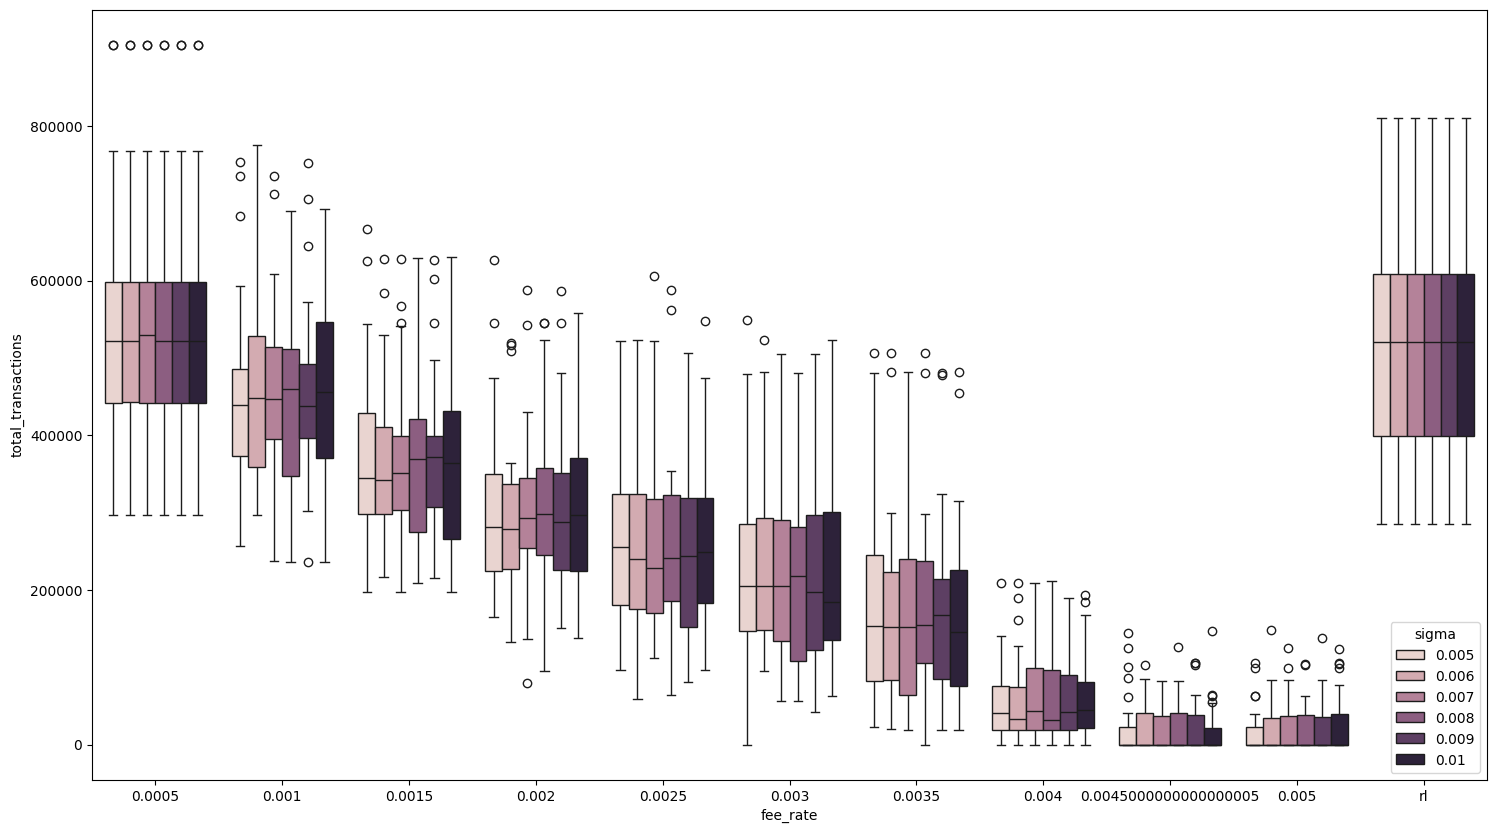

In [10]:
plt.figure(figsize=(18, 10))
sns.boxplot(x=df['fee_rate'], y=df['total_transactions'], hue=df['sigma'])
plt.show()

### V.  Dynamic Fee Rates

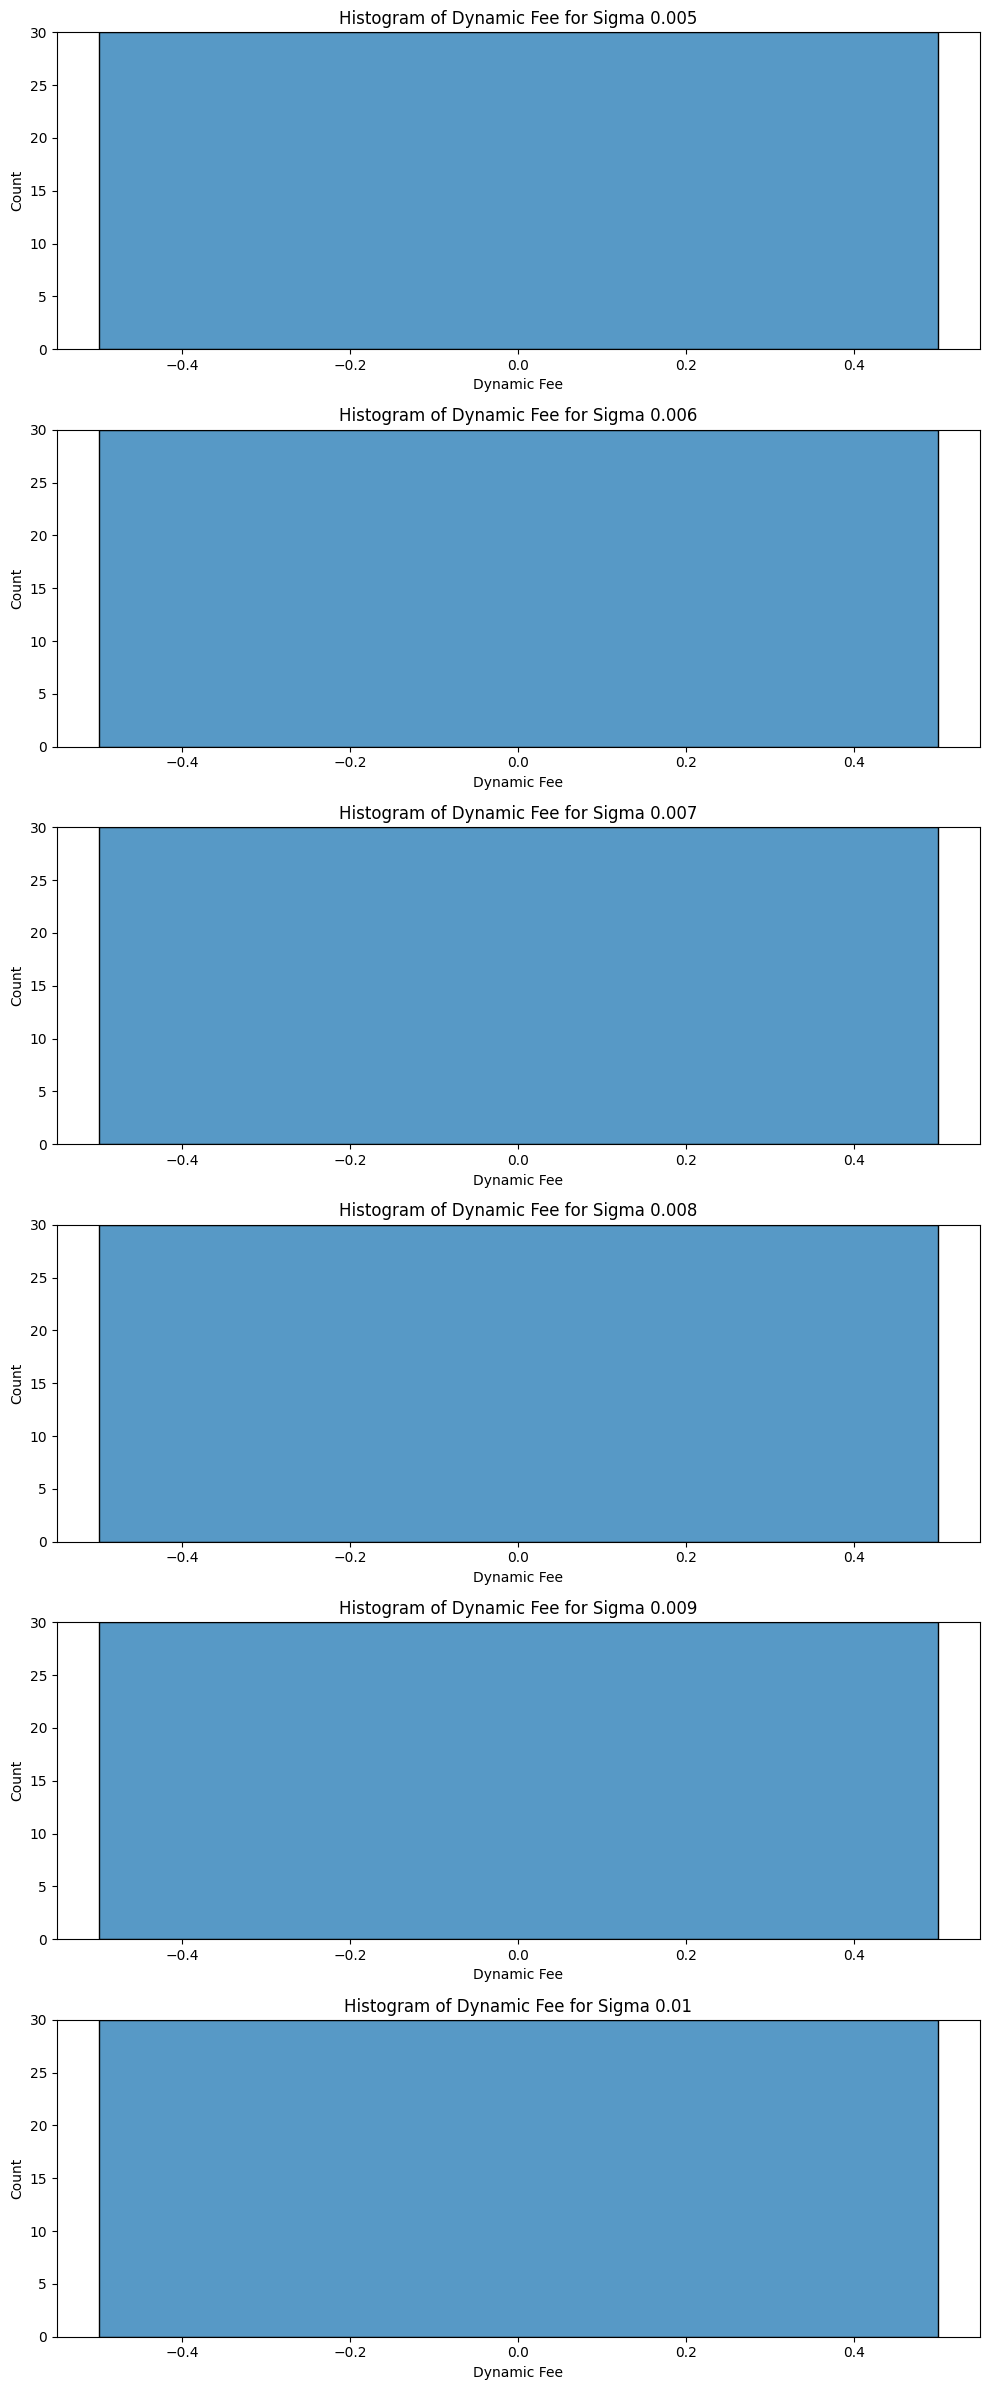

In [11]:
# Extract unique sigma values
sigmas = df['sigma'].unique()
rl_df = df[df['fee_rate'] == 'rl']

# Create subplots with vertical orientation
fig, axes = plt.subplots(len(sigmas), 1, figsize=(10, len(sigmas) * 4), sharey=True)

# Determine the global y-axis range across all sigma values
y_max = 0
for sigma in sigmas:
    subset = rl_df[rl_df['sigma'] == sigma]
    y_max = max(y_max, subset['dynamic_fee'].value_counts().max())

# Plot each sigma's histogram in a separate subplot
for i, sigma in enumerate(sigmas):
    subset = rl_df[rl_df['sigma'] == sigma]

    sns.histplot(data=subset, x='dynamic_fee', kde=False, ax=axes[i])
    
    axes[i].set_xlabel('Dynamic Fee')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of Dynamic Fee for Sigma {sigma}')
    axes[i].set_ylim(0, y_max)  # Set the same y-axis range for all plots

plt.tight_layout()
plt.show()